Karen Gong

Partner: Harrison Robel

PHYS 434 AA Lab 5

The data was taken by the ATLAS detector at the Large Hadron Collider in proton–proton (pp) collision runs at a center-of-mass energy √s = 13 TeV. There were several Monte Carlo (MC) simulated event samples were used for the optimisation of the Higgs boson tagger, estimation of its performance, and the comparisons between data and simulation. All this was to study the techniques for identifying Higgs boson at high transverse momenta decaying into bottom-quark pairs, H → bb¯.

Each of the labels is one of 14 different features. 
'pt' are particles with tranverse momenta.
'eta' is the angle of a particle relative to the beam axis.
'phi' is the azimuthal angle around the z-axis.
'mass' is the mass of the jet.
'ee2' is the energy correlation ratio of the 0-point and 1-point energy correlation function for a jet J. 
'ee3' is the energy correlation ratio of the 2-point and 3-point energy correlation function for a jet J.
'd2' is an energy correlation ratio.
'angularity' is the angularity.
't1' is a form of 1-subjettiness.
't2' is a form of 2-subjettiness.
't3' is a form of 3-subjettiness.
't21' is corresponding ratio for a form of 2-subjettiness.
't32' is corresponding ratio for a form of 2-subjettiness.
'KtDeltaR' corresponds to deltaR of two subjets within the large-R jet.

The first plots show the signal of each feature plotted against its corresponding background. It can be seen that most of the features have discrimination power, but some do not, as they mostly overlap and the signal and background are not significantly distinct from each other. The features that are do not provide discrimination power are eta, phi, angularity, and t32.

In [1]:
%matplotlib inline
# import library
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from sklearn import preprocessing

plt.rcParams["figure.figsize"] = (5,5)

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
infile2 = open("higgs_100000_pt_250_500.pkl", 'rb')
new_dict = pickle.load(infile)
higgs = pickle.load(infile2)

# list all keys of the files
new_dict.keys()
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [ ]:
# Print two variables, mass and d2, of the first 10 jets
#for i in range(10):
#    data = (new_dict['mass'][i],new_dict['d2'][i])

In [2]:
# background data
bgpt = np.array(new_dict.get('pt'))
bgeta = np.array(new_dict.get('eta'))
bgphi = np.array(new_dict.get('phi'))
bgmass = np.array(new_dict.get('mass'))
bgee2 = np.array(new_dict.get('ee2'))
bgee3 = np.array(new_dict.get('ee3'))
bgd2 = np.array(new_dict.get('d2'))
bgangularity = np.array(new_dict.get('angularity'))
bgt1 = np.array(new_dict.get('t1'))
bgt2 = np.array(new_dict.get('t2'))
bgt3 = np.array(new_dict.get('t3'))
bgt21 = np.array(new_dict.get('t21'))
bgt32 = np.array(new_dict.get('t32'))
bgKtDeltaR = np.array(new_dict.get('KtDeltaR'))

# signal data
pt = np.array(higgs.get('pt'))
eta = np.array(higgs.get('eta'))
phi = np.array(higgs.get('phi'))
mass = np.array(higgs.get('mass'))
ee2 = np.array(higgs.get('ee2'))
ee3 = np.array(higgs.get('ee3'))
d2 = np.array(higgs.get('d2'))
angularity = np.array(higgs.get('angularity'))
t1 = np.array(higgs.get('t1'))
t2 = np.array(higgs.get('t2'))
t3 = np.array(higgs.get('t3'))
t21 = np.array(higgs.get('t21'))
t32 = np.array(higgs.get('t32'))
KtDeltaR = np.array(higgs.get('KtDeltaR'))

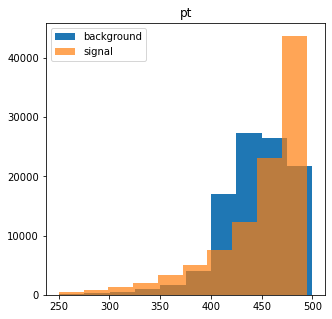

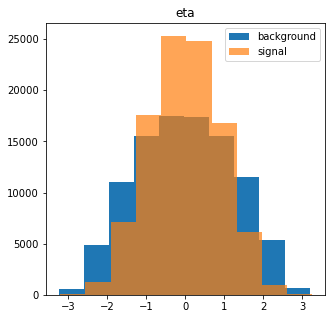

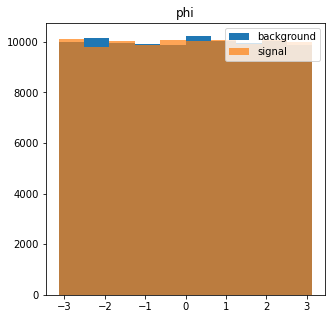

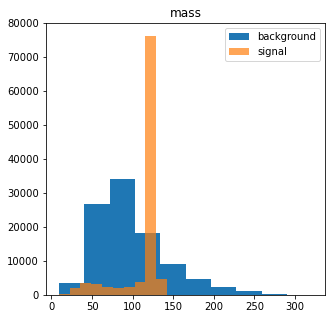

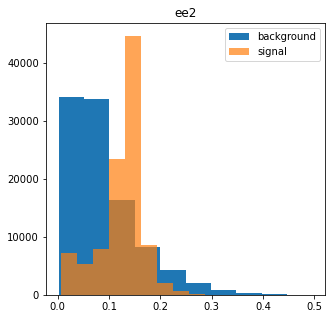

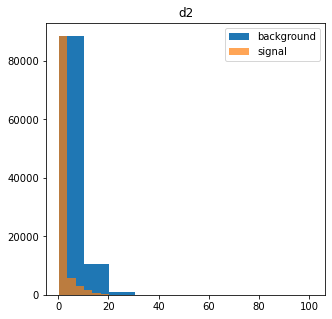

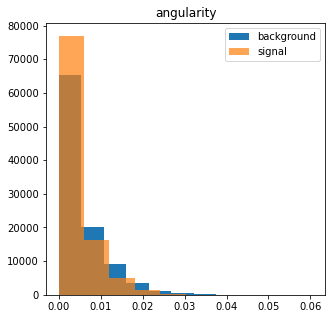

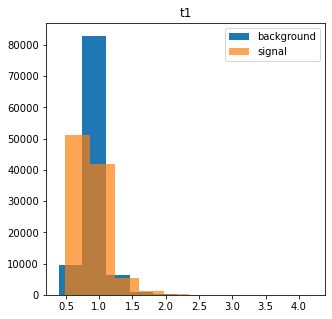

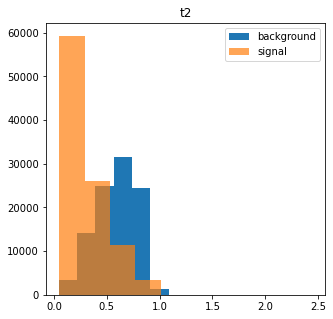

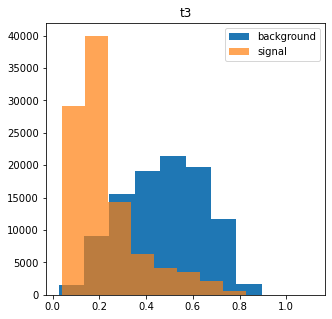

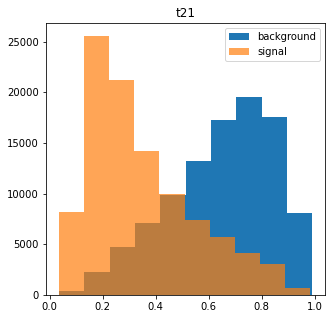

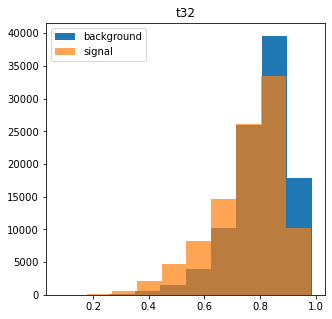

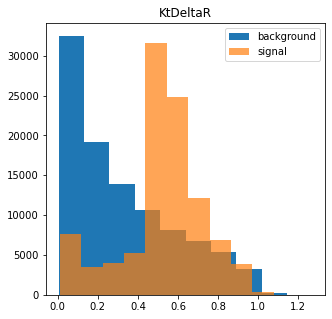

In [7]:
# background vs signal
# this function takes in background data and signal data
# and plots them on a histogram on top of each other
def bgsig(bg, sig, title):
    plt.hist(bg, label = 'background')
    plt.hist(sig, alpha = 0.7, label = 'signal')
    plt.title(title)
    plt.legend()
    plt.show()

bgsig(bgpt, pt, "pt")
bgsig(bgeta, eta, "eta")
bgsig(bgphi, phi, "phi")
bgsig(bgmass, mass, "mass")
bgsig(bgee2, ee2, "ee2")
bgsig(bgd2, d2, "d2")
bgsig(bgangularity, angularity, "angularity")
bgsig(bgt1, t1, "t1")
bgsig(bgt2, t2, "t2")
bgsig(bgt3, t3, "t3")
bgsig(bgt21, t21, "t21")
bgsig(bgt32, t32, "t32")
bgsig(bgKtDeltaR, KtDeltaR, "KtDeltaR")

1.Do all features provide discrimination power between signal and background?

Most of the features provide discrimination power because when the signal of each feature was plotted on to its corresponding background, there is a distinct and significant difference between the two. The features that don't provide discrimination power are eta, phi, angularity, and t32. These overlap a great amount and don't provide discrimination power between the signal and the background. 

2.Are there correlations among these features?

There are correlations among these features. For example, t1, t2, and t3 are related to t21 and t32 because the latter are ratios of the former. There are also correlations between d2 and the energy ratios, as well as between mass, momentum and angularity.

3.Compute expected discovery sensitivity by normalizing each sample appropriately.

In [3]:
norm_bgpt = preprocessing.normalize([bgpt])
norm_pt = preprocessing.normalize([pt])

norm_bgeta = preprocessing.normalize([bgeta])
norm_eta = preprocessing.normalize([eta])

norm_bgphi = preprocessing.normalize([bgphi])
norm_phi = preprocessing.normalize([phi])

norm_bgphi = preprocessing.normalize([bgphi])
norm_phi = preprocessing.normalize([phi])

norm_bgmass = preprocessing.normalize([bgmass])
norm_mass = preprocessing.normalize([mass])

norm_bgee2 = preprocessing.normalize([bgee2])
norm_ee2 = preprocessing.normalize([ee2])

norm_bgee3 = preprocessing.normalize([bgee3])
norm_ee3 = preprocessing.normalize([ee3])

norm_bgd2 = preprocessing.normalize([bgd2])
norm_d2 = preprocessing.normalize([d2])

norm_bgangularity = preprocessing.normalize([bgangularity])
norm_angularity = preprocessing.normalize([angularity])

norm_bgt1 = preprocessing.normalize([bgt1])
norm_t1 = preprocessing.normalize([t1])

norm_bgt2 = preprocessing.normalize([bgt2])
norm_t2 = preprocessing.normalize([t2])

norm_bgt3 = preprocessing.normalize([bgt3])
norm_t3 = preprocessing.normalize([t3])

norm_bgt21 = preprocessing.normalize([bgt21])
norm_t21 = preprocessing.normalize([t21])

norm_bgt32 = preprocessing.normalize([bgt32])
norm_t32 = preprocessing.normalize([t32])

norm_bgKtDeltaR = preprocessing.normalize([bgKtDeltaR])
norm_KtDeltaR = preprocessing.normalize([KtDeltaR])

4.Develop a plan to optimize the discovery sensitivity by applying selections to these features.
To optimize the discovery sensitivity, we need to find a moment in the signal data that has a very small chance of being caused by the background data. To do this, we need to compare the background data with the signal data to see if there is a significant enough difference between the datasets that could have produced the signal distribution.